In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
img_array = cv2.imread("Test_Dataset/closed_eyes/s0005_00651_0_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)


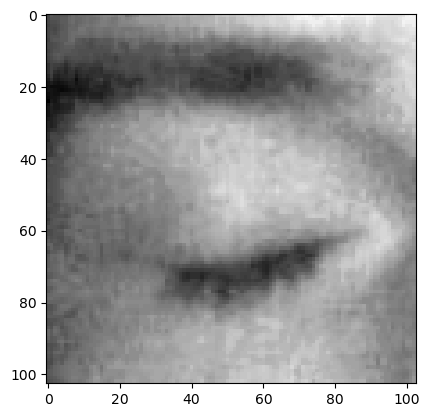

In [3]:
plt.imshow(img_array,cmap = "gray")

In [4]:
img_array.shape

(103, 103)

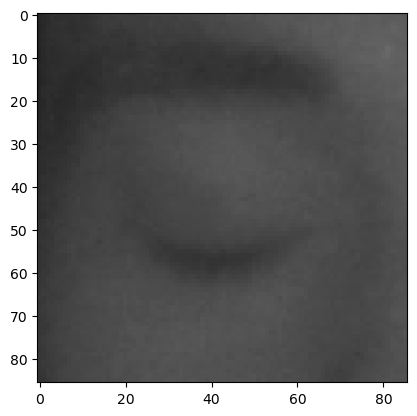

In [5]:
Datedirectory = "Train_Dataset/"
Classes = ["closed_eyes", "open_eyes"]

for category in Classes:
    path = os.path.join(Datedirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(backtorgb, cmap="gray")  # Fixed the typo 'camp' to 'cmap'
        plt.show()
        break  # Remove this line if you want to display all images in the folder
    break 

In [7]:
img_size = 56

# Reading all the images and converting them into an array for data and labels
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datedirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_Data()

random.shuffle(training_Data)
X = []
Y = []
for features, label in training_Data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)  # Reshape with channel dimension as 3
X = X / 255.0
Y = np.array(Y)

model = tf.keras.applications.MobileNet(input_shape=(img_size, img_size, 3), include_top=False, weights='imagenet')
base_output = model.layers[-6].output  # Modify this index based on the 'conv_dw_2_relu' layer

# Flatten the output
flat_layer = layers.Flatten()(base_output)

# Add the final output layer
final_output = layers.Dense(1)(flat_layer)  # one node (1/0)
final_output = layers.Activation("sigmoid")(final_output)

# Create the new model
new_model = keras.Model(inputs=model.input, outputs=final_output)
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
new_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 28, 28, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 28, 28, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 28, 28, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 28, 28, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 28, 28, 32)        128   

                                                                 
 conv_dw_8 (DepthwiseConv2D  (None, 3, 3, 512)         4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 3, 3, 512)         2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 3, 3, 512)         0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 3, 3, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 3, 3, 512)         2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 3, 3, 512)         0         
          

In [7]:
new_model.fit(X, Y, epochs=20, validation_split=0.1, verbose=True)

Epoch 1/20
2298/2298 [==============================] - 342s 144ms/step - loss: 0.0518 - accuracy: 0.9824 - val_loss: 0.0388 - val_accuracy: 0.9884
Epoch 2/20
2298/2298 [==============================] - 330s 144ms/step - loss: 0.0330 - accuracy: 0.9886 - val_loss: 0.0350 - val_accuracy: 0.9884
Epoch 3/20
2298/2298 [==============================] - 329s 143ms/step - loss: 0.0276 - accuracy: 0.9903 - val_loss: 0.0310 - val_accuracy: 0.9890
Epoch 4/20
2298/2298 [==============================] - 329s 143ms/step - loss: 0.0239 - accuracy: 0.9917 - val_loss: 0.0262 - val_accuracy: 0.9916
Epoch 5/20
2298/2298 [==============================] - 324s 141ms/step - loss: 0.0208 - accuracy: 0.9924 - val_loss: 0.0297 - val_accuracy: 0.9887
Epoch 6/20
2298/2298 [==============================] - 323s 141ms/step - loss: 0.0188 - accuracy: 0.9929 - val_loss: 0.0332 - val_accuracy: 0.9893
Epoch 7/20
2298/2298 [==============================] - 324s 141ms/step - loss: 0.0154 - accuracy: 0.9940 - val_

In [8]:


model_filename = "my_model2.h5"
new_model.save(model_filename)

F:\anacondainstall\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [9]:
new_model = tf.keras.models.load_model("my_model2.h5")

In [ ]:
try:
    img_array = cv2.imread("unnamed.png", cv2.IMREAD_GRAYSCALE)
    if img_array is None:
        raise ValueError("Image not loaded. Check the file path.")
    
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    new_array = cv2.resize(backtorgb, (img_size, img_size))/255.0
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
new_array.shape

In [ ]:
new_array.reshape(1, img_size,img_size, 3)

In [ ]:
x_input = np.array(new_array).reshape(1, img_size,img_size, 3)



In [ ]:
plt.imshow(new_array)


In [ ]:
prediction = new_model.predict(x_input)

In [ ]:
prediction

In [10]:
Datedirectory1 = "Test_Dataset/"
Classes1 = ["closed_eyes", "open_eyes"]

img_size = 56

def preprocess_image(file_path):
    try:
        img_array = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if img_array is None:
            raise ValueError("Image not loaded. Check the file path.")
        
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(backtorgb, (img_size, img_size)) / 255.0
        return new_array
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

X_test = []  # List to store preprocessed test images
Y_test = []  # List to store corresponding labels (0 for closed_eyes, 1 for open_eyes)

for category in Classes1:
    path = os.path.join(Datedirectory, category)
    class_num = Classes1.index(category)
    for img_file in os.listdir(path):
        img_path = os.path.join(path, img_file)
        new_array = preprocess_image(img_path)
        if new_array is not None:
            X_test.append(new_array)
            Y_test.append(class_num)

# Convert the lists to numpy arrays
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("Test data loaded and preprocessed successfully.")

Test data loaded and preprocessed successfully.


In [11]:

# Assuming you have loaded the model 'loaded_model' and the test data 'X_test' and 'Y_test'

model_filename = "my_model2.h5"
loaded_model = keras.models.load_model(model_filename)
predictions = loaded_model.predict(X_test)
# Initialize counters for correct predictions
correct_closed_eyes = 0
correct_open_eyes = 0

# Loop through the predictions and actual labels to count correct predictions
for i in range(len(Y_test)):
    if predictions[i][0] > 0.5:  # If the prediction is greater than 0.5, eye is open
        if Y_test[i] == 1:  # If the actual label is 1 (open eyes)
            correct_open_eyes += 1
    else:  # If the prediction is less than or equal to 0.5, eye is closed
        if Y_test[i] == 0:  # If the actual label is 0 (closed eyes)
            correct_closed_eyes += 1

# Calculate the accuracy for closed and open eyes
total_closed_eyes = np.sum(Y_test == 0)
total_open_eyes = np.sum(Y_test == 1)

accuracy_closed_eyes = correct_closed_eyes / total_closed_eyes
accuracy_open_eyes = correct_open_eyes / total_open_eyes

print(f"Correctly predicted closed eyes: {correct_closed_eyes} / {total_closed_eyes} (Accuracy: {accuracy_closed_eyes:.2f})")
print(f"Correctly predicted open eyes: {correct_open_eyes} / {total_open_eyes} (Accuracy: {accuracy_open_eyes:.2f})")


2553/2553 [==============================] - 88s 31ms/step
Correctly predicted closed eyes: 16065 / 40380 (Accuracy: 0.40)
Correctly predicted open eyes: 17254 / 41295 (Accuracy: 0.42)


In [ ]:
# reading all the images and converting them into an array for data and labels
img_size = 56
trianing_Data = []

def create_trianing_Data():
    for category in Classes:
        path = os.path.join(Datedirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                trianing_Data.append([new_array, class_num])
            except Exeption as e:
                pass

In [ ]:
create_trianing_Data()

In [ ]:
print(len(trianing_Data))

In [ ]:
import random
random.shuffle(trianing_Data)

In [ ]:
X = []
Y = []
for features, label in trianing_Data:
    
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

X.shape

In [ ]:
#normalize the  data
X= X/255.0;

In [ ]:
Y= np.array(Y)


In [ ]:
# import pickle

# # Save data to X.pickle
# pickle_out = open("X.pickle", "wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# # Save data to y.pickle
# pickle_out = open("y.pickle", "wb")
# pickle.dump(Y, pickle_out)
# pickle_out.close()

# # Load data from X.pickle
# pickle_in = open("X.pickle", "rb")
# X_loaded = pickle.load(pickle_in)
# pickle_in.close()

# # Load data from y.pickle
# pickle_in = open("y.pickle", "rb")
# y_loaded = pickle.load(pickle_in)
# pickle_in.close()

# # Check if the loaded data matches the original data
# print("X data matches original data:", X_loaded == X)
# print("y data matches original data:", y_loaded == y)


In [ ]:
# deep learning model for training transfer leratning

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()


In [ ]:
model.summary()

# Transfer Laerning


In [ ]:
# base_input = model.layers[0].input ##input

# base_output = model.layers[-4].output


# Flat_Layer = layers.Flatten()(base_output)
# final_output = layers.Dense(1)(Flat_Layer) ## one node (1/0)
# final_ouput = layers.Activation("sigmoid")(final_output)


# new_model = keras.Model(inputs = base_input, outputs = final_output)

base_output = model.layers[-6].output  # Modify this index based on the 'conv_dw_2_relu' layer

# Flatten the output
flat_layer = layers.Flatten()(base_output)

# Add the final output layer
final_output = layers.Dense(1)(flat_layer)  # one node (1/0)
final_output = layers.Activation("sigmoid")(final_output)

# Create the new model
new_model = keras.Model(inputs=model.input, outputs=final_output)

In [ ]:
new_model.summary()

# Settings for binary classification (open/closed)


In [ ]:
new_model.compile(loss= "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 30, validation_split= 0.1, verbose=True) ##  training


OSError: No file or directory found at my_model.h5

In [ ]:
new_model = tf.keras.models.load_model("my_model.h5")

# Checking predictions

In [ ]:
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

In [ ]:
try:
    img_array = cv2.imread("s0001_02587_0_1_1_0_0_01.png", cv2.IMREAD_GRAYSCALE)
    if img_array is None:
        raise ValueError("Image not loaded. Check the file path.")
    
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
    new_array = cv2.resize(backtorgb, (img_size, img_size))
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
x_input = np.array(new_array).reshape(1, img_size,img_size, 3)

In [ ]:
x_input = np.array(new_array).reshape(1, img_size,img_size, 3)

x_input.shape
plt.imshow(new_array)
x_input = x_input/255.0
prediction = new_model.predict(x_input)

In [ ]:
plt.imshow(new_array)

In [ ]:
x_input = x_input/255.0

In [ ]:
prediction = new_model.predict(x_input)

In [ ]:
prediction